# **CodeStates project #1**

Title : 다음 분기에 어떤 게임을 설계해야 할까?  
Data  : https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv  

##**Question to Solve**
1. 지역에 따라서 선호하는 게임 장르가 다를까?
2. 연도별 게임의 트렌드가 있을까?
3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스


# **STEP 1 : 데이터 불러오기 및 전처리**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#from google.colab import files
#from pandas_profiling import ProfileReport

In [2]:
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv',index_col=0)
#df.shape

In [3]:
# refine sales data
def value_to_float(x):
  if type(x) == float or type(x) ==int:
    return x
  if 'K' in x:
    return float(x.replace('K',''))*0.001
  if 'M' in x:
    return float(x.replace('M',''))
  else:
    return float(x)

df['NA_Sales'] = df['NA_Sales'].apply(value_to_float)
df['EU_Sales'] = df['EU_Sales'].apply(value_to_float)
df['JP_Sales'] = df['JP_Sales'].apply(value_to_float)
df['Other_Sales'] = df['Other_Sales'].apply(value_to_float)

In [4]:
# refine Year
df.loc[df.Year<=22,'Year'] += 2000
df.loc[df.Year<=99,'Year'] += 1900

In [5]:
# Feature engineering (Total sales)
df['Total_Sales'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']

In [6]:
# Drop null values
df = df.dropna()

In [7]:
# Check duplicates
df.duplicated(keep=False).sum()

0

In [8]:
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00,0.04
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20
16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01
16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79
16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38


# **STEP 2 : 기본적인 데이터 분석**

## **상관관계 (correlation)**

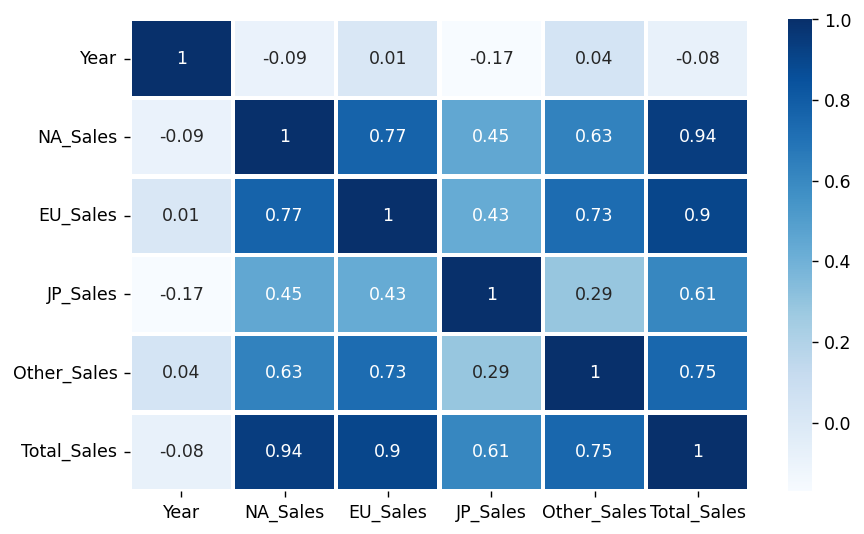

In [9]:
# corr between each data set
plt.figure(figsize=(8,5),dpi=125)
sns.heatmap(np.round(df.corr(),2),annot=True,cmap = "Blues",linewidth=2)
plt.show()

-> 데이터간의 상관관계를 통하여 우리는 NA_Sales*(0.94)* 와 EU_Sales*(0.9)* 는 Total_Sales과 높은 상관관계를 가진다는 것을 알수있다.  
-> 이를 통해 우리는 글로벌 세일즈는 북미와 유럽 시장에 가장 큰 영향을 받는 다는 사실을 확인할 수 있다.

##**장르별 게임 배포 수**

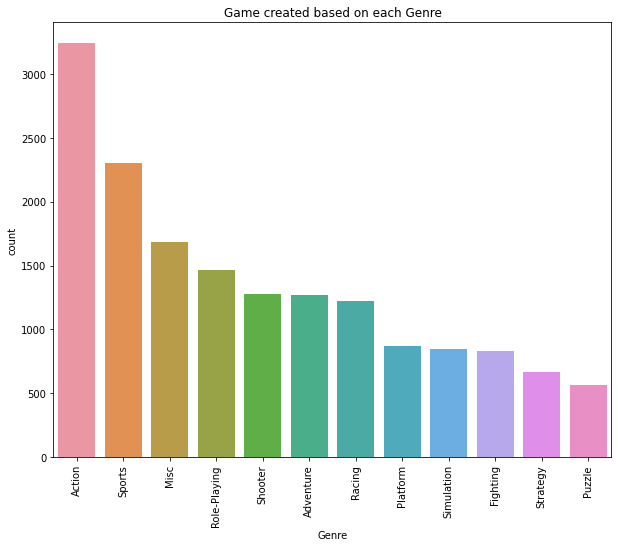

In [10]:
plt.figure(figsize=(10,8))
sns.countplot(x='Genre',data=df,order=df['Genre'].value_counts().index)
plt.title('Game created based on each Genre')
plt.xticks(rotation=90)
plt.show()

##**장르별 게임 판매수**

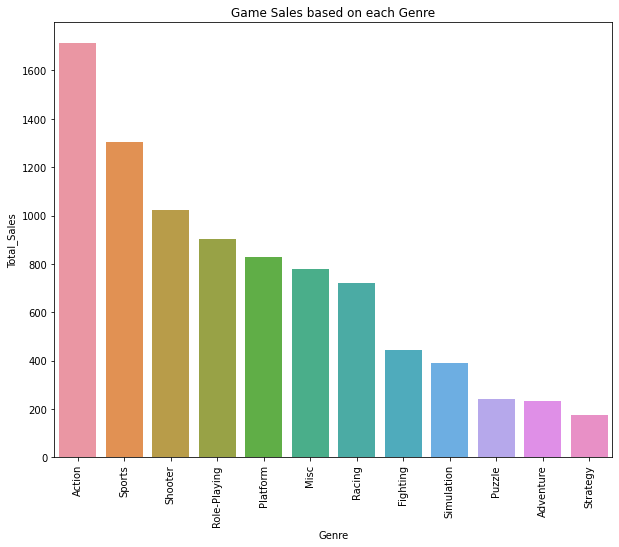

In [72]:
df_GenreSale = df[['Genre','Total_Sales']].groupby(['Genre']).sum().sort_values(by=['Total_Sales'],ascending=False)
df_GenreSale.reset_index(drop=False,inplace=True)

plt.figure(figsize=(10,8))
sns.barplot(x=df_GenreSale['Genre'],y=df_GenreSale['Total_Sales'])
plt.title('Game Sales based on each Genre')
plt.xticks(rotation=90)
plt.show()

#**STEP 3 : 데이터 분석 논점**

## **1. 지역에 따른 선호 장르**

In [12]:
df_Genre = df[['Genre','Total_Sales','NA_Sales','EU_Sales','JP_Sales','Other_Sales']].groupby(['Genre']).sum().sort_values(by=['Total_Sales'],ascending=False)
df_Genre.reset_index(drop=False,inplace=True)
df_Genre.head()

,Genre,Total_Sales,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Action,1712.98,858.75,513.64,156.60,183.99
1,Sports,1305.34,667.26,370.97,134.76,132.35
2,Shooter,1024.75,574.48,310.23,38.18,101.86
3,Role-Playing,901.51,318.76,183.09,342.93,56.73
4,Platform,827.99,445.38,200.63,130.53,51.45


In [13]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [14]:
labels = list(df_Genre['Genre'])
NAval = list(df_Genre['NA_Sales'])
EUval = list(df_Genre['EU_Sales'])
JPval = list(df_Genre['JP_Sales'])
Otherval = list(df_Genre['Other_Sales'])

In [15]:
#specs = [[{'type':'domain'}, {'type':'domain'}], [{'type':'domain'}, {'type':'domain'}]]
specs = [[{'type':'domain'}, {'type':'domain'},{'type':'domain'}, {'type':'domain'}]]

fig = make_subplots(rows=1, cols=4,specs=specs)
fig.add_trace(go.Pie(labels=labels,values=NAval,hole=.3,pull=.03,title='NA'), 1, 1)
fig.add_trace(go.Pie(labels=labels,values=EUval,hole=.3,pull=.03,title='EU'), 1, 2)
fig.add_trace(go.Pie(labels=labels,values=JPval,hole=.3,pull=.03,title='JP'), 1, 3)
fig.add_trace(go.Pie(labels=labels,values=Otherval,hole=.3,pull=.03,title='Other'), 1, 4)

fig.update_traces(textposition='inside', textinfo='percent+label')
#fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
fig.update_layout(title_text="Percentage of Genre by Region")
fig.show()

-> 지역별로 선호하는 게임의 장르가 다르다는 것을 알수있다.  
-> 특히 일본의 장르 선호도는 북미와 유럽과 비교적 차이가 많이 난다는 것을 알수있다.  

## **2. 연도별 게임 트랜드**

### **연도별 게임 장르**

In [16]:
year_max_df = df.groupby(['Year','Genre']).size().reset_index(name='count')
year_max_idx = year_max_df.groupby(['Year'])['count'].transform(max) == year_max_df['count']
year_max_genre = year_max_df[year_max_idx].reset_index(drop=True)
year_max_genre = year_max_genre.drop_duplicates(subset=["Year", "count"], keep='last').reset_index(drop=True)
genre = year_max_genre['Genre'].values

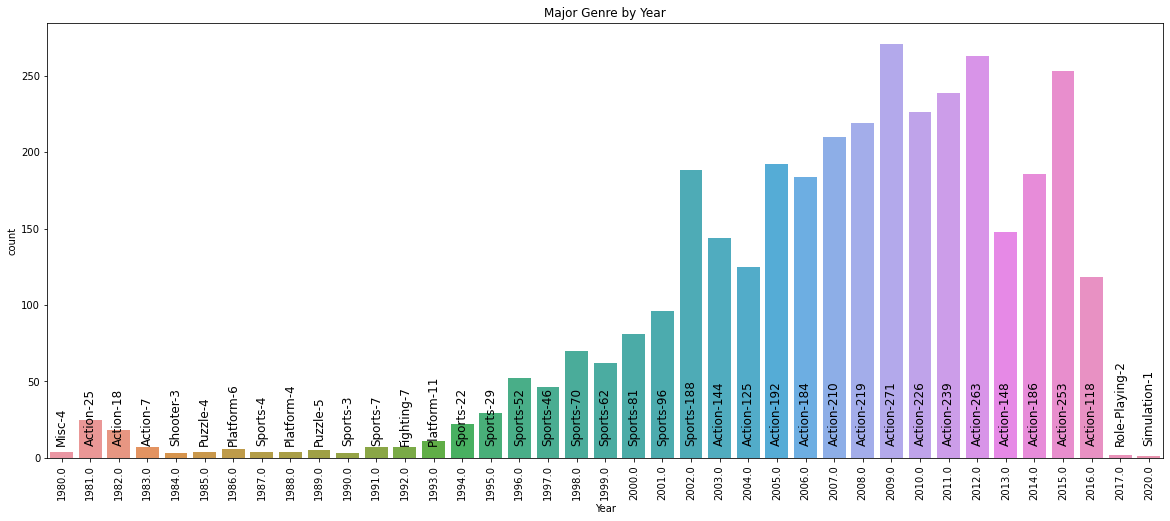

In [17]:
plt.figure(figsize=(20,8))
g = sns.barplot(x='Year',y='count',data=year_max_genre)
index=0
for value in year_max_genre['count'].values:
  g.text(index,10, str(genre[index] + '-' +str(value)), size=14, rotation= 90, ha="center",fontsize=12)
  index += 1
plt.xticks(rotation=90)
plt.title("Major Genre by Year")
plt.show()

### **연도별 게임 플렛폼**

In [18]:
df1 = df
df1['Platform'] = df['Platform'].replace({'SNES' : 'Nintendo','N64' : 'Nintendo', '3DS' : 'Nintendo', 'Wii' : 'Nintendo','WiiU' : 'Nintendo', 'NES' : 'Nintendo', 'DS' : 'Nintendo', 'GBA' : 'Nintendo', 'GB' : 'Nintendo','GC' : 'Nintendo'})
df1['Platform'] = df1['Platform'].replace({'X360' : 'Xbox', 'XOne' : 'Xbox'})
df1['Platform'] = df1['Platform'].replace({'PS4' : 'SONY', 'PS3' : 'SONY', 'PS2' : 'SONY','PS' : 'SONY', 'PSP' : 'SONY', 'PSV' : 'SONY'})

In [19]:
year_max_platform_df = df1.groupby(['Year','Platform']).size().reset_index(name='count')
year_max_platform_idx = year_max_platform_df.groupby(['Year'])['count'].transform(max) == year_max_platform_df['count']
year_max_platform = year_max_platform_df[year_max_platform_idx].reset_index(drop=True)
year_max_platform = year_max_platform.drop_duplicates(subset=["Year", "count"], keep='last').reset_index(drop=True)
platform = year_max_platform['Platform'].values

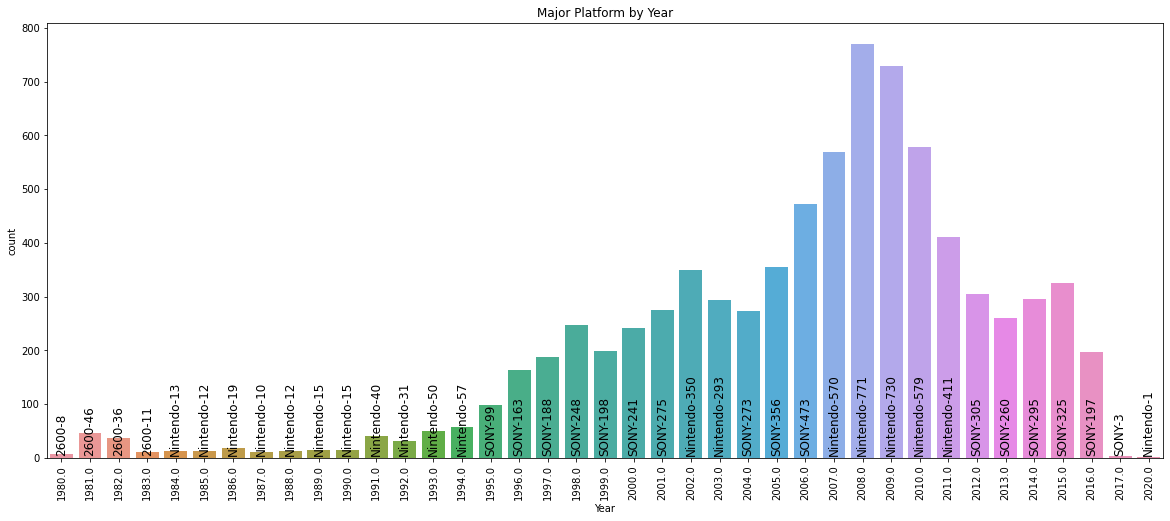

In [20]:
plt.figure(figsize=(20,8))
k = sns.barplot(x='Year',y='count',data=year_max_platform)
index=0
for value in year_max_platform['count'].values:
  k.text(index,10, str(platform[index] + '-' +str(value)), size=14, rotation= 90, ha="center",fontsize=12)
  index += 1
plt.xticks(rotation=90)
plt.title("Major Platform by Year")
plt.show()

##**3. 출고량이 높은 게임에 대한 분석 및 시각화**

In [65]:
df_top = df
df_top = df_top.groupby(['Name','Genre','Publisher'],as_index=False)['Total_Sales'].sum()
df_top = df_top.sort_values(by=['Total_Sales'],ascending=False)
df_top = df_top.reset_index(drop=False)
df_top

,index,Name,Genre,Publisher,Total_Sales
0,11179,Wii Sports,Sports,Nintendo,82.74
1,3766,Grand Theft Auto V,Action,Take-Two Interactive,55.92
2,9487,Super Mario Bros.,Platform,Nintendo,45.31
3,9882,Tetris,Puzzle,Nintendo,35.84
4,5653,Mario Kart Wii,Racing,Nintendo,35.83
...,...,...,...,...,...
11662,3105,Farming 2017 - The Simulation,Simulation,UIG Entertainment,0.01
11663,492,Art Academy: Home Studio,Misc,Nintendo,0.01
11664,3101,Farm Frenzy,Strategy,Mumbo Jumbo,0.01
11665,10595,Touch Detective 3: Does Funghi Dream of Bananas?,Adventure,Success,0.01


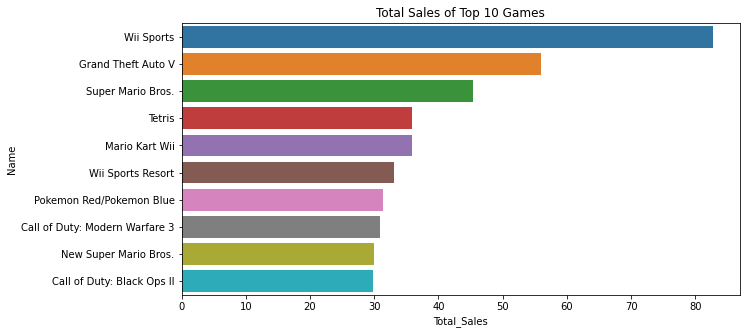

In [66]:
plt.figure(figsize=(10,5))
sns.barplot(x='Total_Sales',y='Name',data=df_top.head(10))
plt.title('Total Sales of Top 10 Games')
plt.show()

# **발표용 이미지 제작 (word cloud)**

In [55]:
from wordcloud import WordCloud

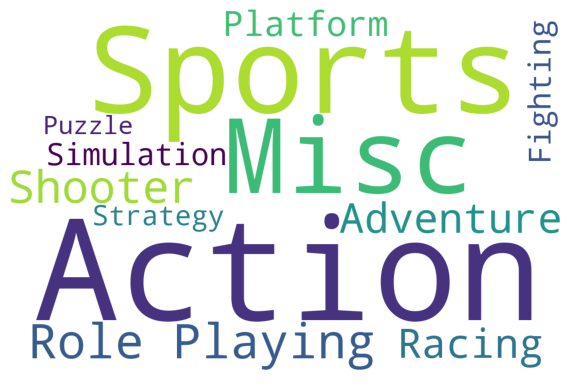

In [63]:
plt.figure(figsize=(10,10))
wordcloud = WordCloud(background_color='White',width=1080,height=720).generate(" ".join(df['Genre']))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

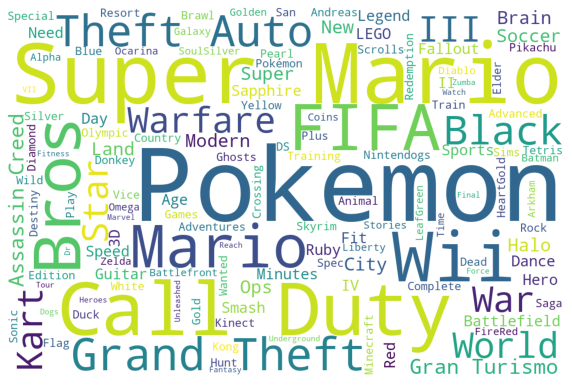

In [67]:
plt.figure(figsize=(10,10))
wordcloud = WordCloud(background_color='White',width=1080,height=720).generate(" ".join(df_top.head(100)['Name']))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

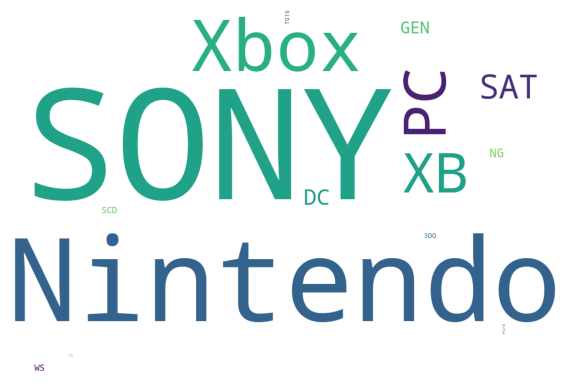

In [70]:
plt.figure(figsize=(10,10))
wordcloud = WordCloud(background_color='White',width=1080,height=720).generate(" ".join(df['Platform']))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()